# Employee attrition dataset analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="darkgrid", palette="pastel", font = 'Times New Roman', font_scale = 1.5)

### Importing the dataset

In [3]:
data = pd.read_csv('./Attrition data.csv')

In [4]:
data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


### Things to note about the dataset:

- Education (1: Below college, 2: College, 3: Bachelor, 4: Master, 5. Doctor)
- Environment satisfaction (1: Low, 2: Medium, 3:High, 4: Very high)
- Job satisfaction (1: Low, 2: Medium, 3:High, 4: Very high)
- Work/life balance (1: Bad, 2: Good, 3: Better, 4: Best)
- Distance from home measured in kilometers

Source: https://www.kaggle.com/datasets/prachi13/employeeattritionrate

### Aim of the project

- To determine if there are patterns and trends that can be spotted to predict which factors lead to an employee leaving the company. Such analysis can help companies decide on a sustainable strategy to retain their employees.

### Questions to be answered about the dataset
- Age based analysis
    - What does the age based distribution of the employees working at this company look like?
    - By seperating the employees into different age groups: How much percentage of the employees belong to which age range and do they still work at the company or not?
    - How many jobs have the employees had based on their age group and do they still work at this company?
- Department based analysis
    - What is the average monthly income based on the departments
    - Which department has the highest and lowest attrition rates?
    - What is the relationship between work environment satisfaction, job satisfaction, work/life balance and the different departments
- Distance based analysis
    - What is the relationship between distance from home and the job satisfaction of the employees?
    - How does distance from home affect the attrition rate?
- Education based analysis
    - Does the education level of the employee influence their monthly income?
    - What is the relationship between attrition rates and education level of the employees?
- Income based analysis
    - Is the employee's salary influencing their job satisfaction?
    - Does the monthly income of the employees suggest any patterns in terms of them staying at the company or leaving?

### Table of content
1. Cleaning up the data
2. Pie chart representing the attrition rate
3. Age based analysis and visualization
4. Department based analysis and visualization
5. Distance based analysis and visualization
6. Education based analysis and visulization
7. Income based analysis and visualization
8. Correlation test

### 1. Cleaning up the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [6]:
# There are 13 columns and 1470 rows
# The dataset contains a a combination of integer data type and object data type 

In [7]:
data.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [8]:
# There are no null values in the dataset

In [9]:
data[data.duplicated()]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany


In [10]:
# There are no duplicate rows in the dataset

In [11]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [12]:
data.columns = data.columns.str.lower()

# The names of the columns are now all in lower case which makes it easier to work with them in codes

In [13]:
data.rename(columns={'distancefromhome':'distance_from_home',
                     'educationfield': 'education_field',
                     'environmentsatisfaction': 'environment_satisfaction',
                     'jobsatisfaction': 'job_satisfaction',
                     'maritalstatus': 'marital_status',
                     'monthlyincome': 'monthly_income',
                     'numcompaniesworked': 'num_companies_worked',
                     'worklifebalance': 'work_life_balance',
                     'yearsatcompany' : 'years_at_company'}, inplace=True)

In [14]:
data.head()

,age,attrition,department,distance_from_home,education,education_field,environment_satisfaction,job_satisfaction,marital_status,monthly_income,num_companies_worked,work_life_balance,years_at_company
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


### 2. Pie chart representing the attrition rate

In [15]:
# This shows the number of employees still working at the company and the ones who left

data['attrition'].value_counts()

No     1233
Yes     237
Name: attrition, dtype: int64

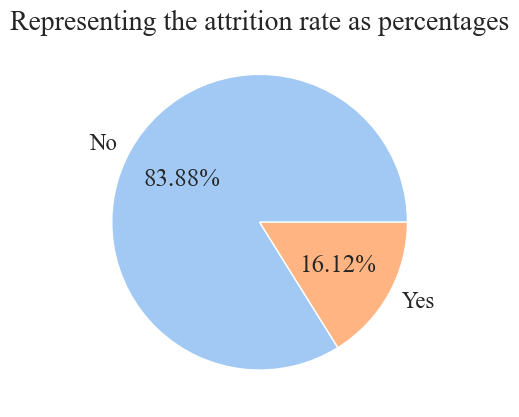

In [16]:
attrition_rate_data = [1233, 237]
labels = ['No', 'Yes']

plt.pie(attrition_rate_data, labels = labels, autopct='%.2f%%')

plt.title("Representing the attrition rate as percentages", fontsize = 20)

plt.show()

### 3. Age based analysis and visualization

In [17]:
# Descriptive statistics of the age variable:

data['age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

Text(0.5, 21.444444444444443, 'Age')

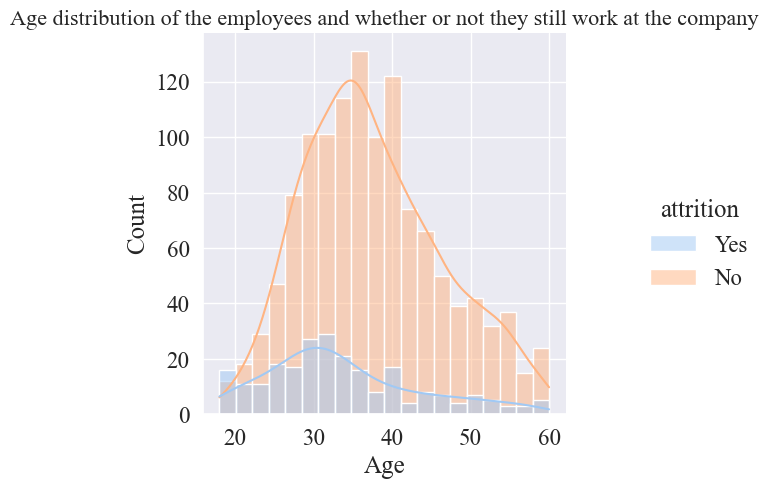

In [18]:
# Showing the age distribution using a histogram

sns.displot(x = 'age', hue= 'attrition', data = data, kde = True, bins = 20)

plt.title('Age distribution of the employees and whether or not they still work at the company', fontsize = 16)
plt.xlabel('Age')

In [19]:
# Now I will create a new column where the employees will be divided into one of 4 different age groups:
# Group 1 = Ages 18 - 30, Group 2 = Ages 30 - 40, Group 3 = Ages 40 - 50, Group 4 = Ages 50 - 60
# By grouping the employees into different age groups it will be easier to analyse patterns for them

bins = [17, 30, 40, 50, 61]
labels = [1, 2, 3, 4]

data['age_group'] = pd.cut(data['age'], bins = bins, labels = labels)

In [20]:
data.head()

,age,attrition,department,distance_from_home,education,education_field,environment_satisfaction,job_satisfaction,marital_status,monthly_income,num_companies_worked,work_life_balance,years_at_company,age_group
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,3
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,3
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,2
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,2
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,1


In [21]:
data['age_group'].value_counts()

2    619
1    386
3    322
4    143
Name: age_group, dtype: int64

In [22]:
data['age_group'].value_counts(normalize=True)

2    0.421088
1    0.262585
3    0.219048
4    0.097279
Name: age_group, dtype: float64

Text(0.5, 0, 'Age Group')

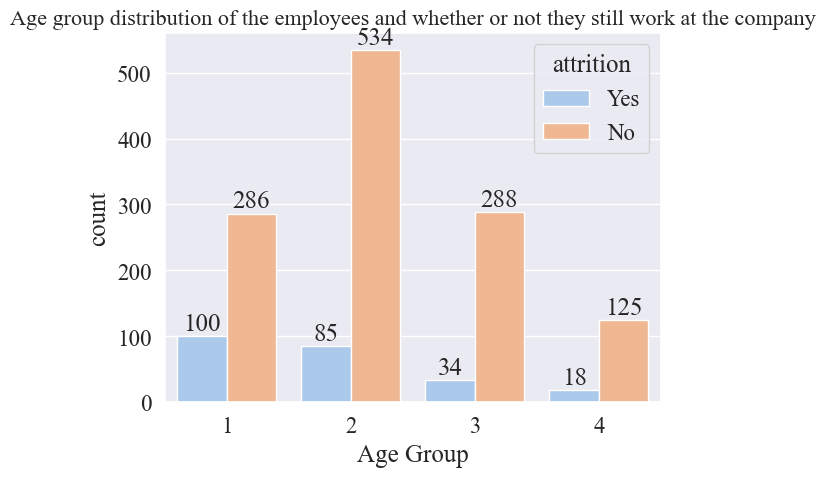

In [23]:
ax = sns.countplot(x='age_group', hue = 'attrition', data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Age group distribution of the employees and whether or not they still work at the company', fontsize = 16)
plt.xlabel('Age Group')

In [24]:
# Using the values shown in the graph we can calculate the relative attrition rate for each age group
# This will help determine which age group has a higher tendency to leave the company
# For example the % of people having left the company in group 1 is 25.91% and for group 2 is 13.73%, etc.

Text(0, 0.5, 'Average number of companies worked at')

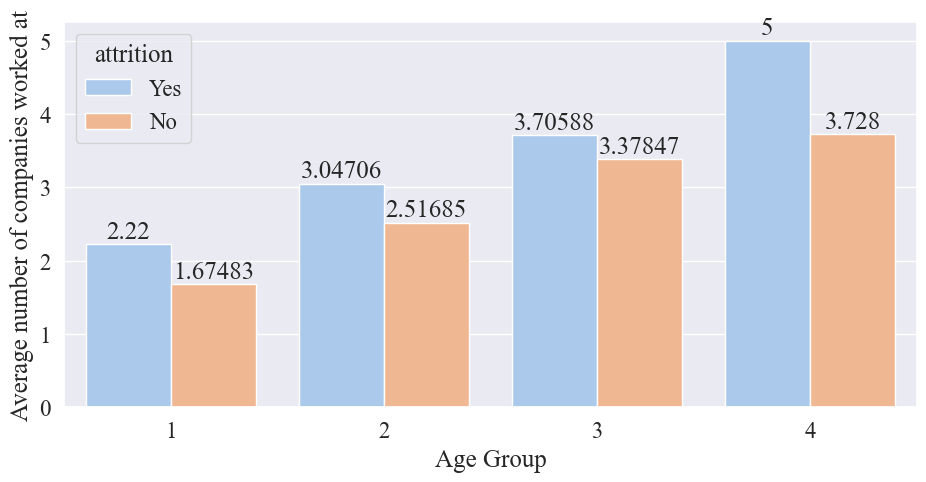

In [63]:
plt.figure(figsize = (11,5))

ax = sns.barplot(x='age_group', y = 'num_companies_worked', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Age Group')
plt.ylabel('Average number of companies worked at')

In [26]:
# This data shows us that the people who have left the company have a higher average number of companies worked at
# This suggests that they have a higher tendency of shifting to newer jobs
# In general there is a positive trend between age group and average number of companies worked at
# This is expected as the older an employee is, the more their experience in the job market would be

### 4. Department based analysis and visualization

In [27]:
data['department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64

In [28]:
data['department'].value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: department, dtype: float64

Text(0.5, 0, 'Department')

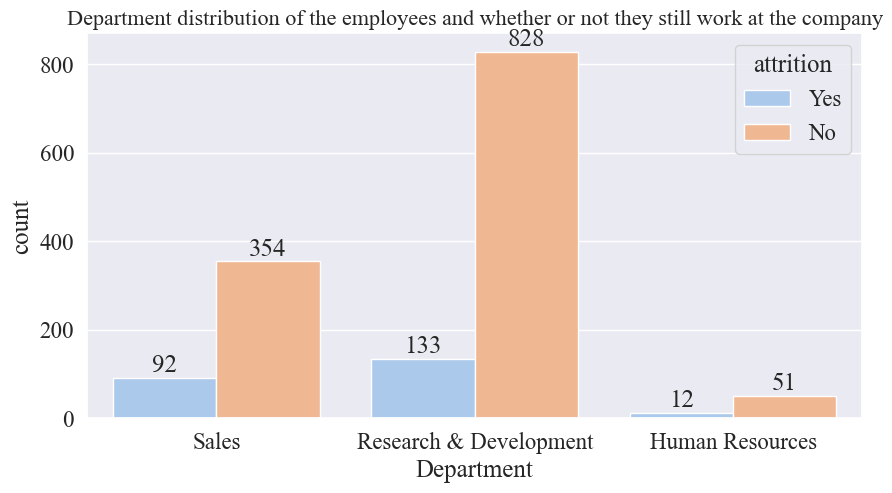

In [29]:
# Visualizing the department based distribution of the employees

plt.figure(figsize=(10,5))

ax = sns.countplot(x='department', hue = 'attrition', data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Department distribution of the employees and whether or not they still work at the company', fontsize = 16)
plt.xlabel('Department')

In [30]:
# Relative attrition rates:
# Sales department = 20.62%
# Research & Development department = 13.84%
# Human resources = 19.05%

In [31]:
data.groupby('department')['monthly_income'].mean()

department
Human Resources           6654.507937
Research & Development    6281.252862
Sales                     6959.172646
Name: monthly_income, dtype: float64

Text(0, 0.5, 'Average monthly income')

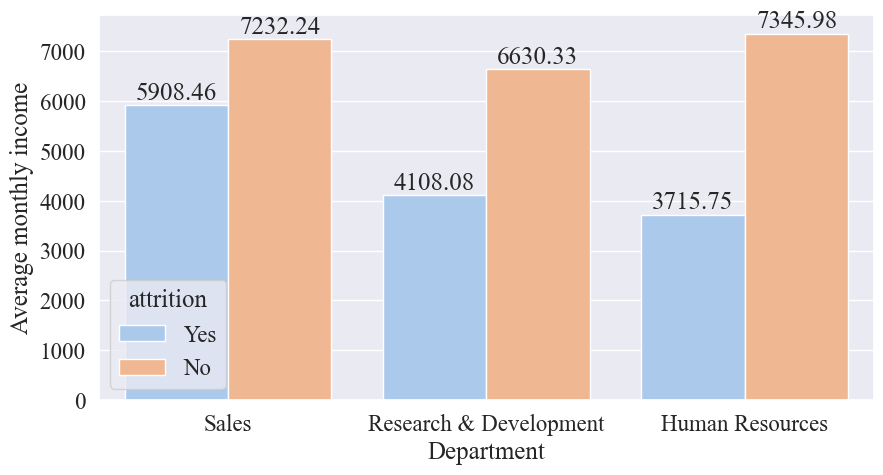

In [32]:
plt.figure(figsize = (10,5))

ax = sns.barplot(x='department', y = 'monthly_income', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Department')
plt.ylabel('Average monthly income')

In [33]:
# On average ex employees earned less than current ones
# Even though the sales department has the highest average monthly income out of the 3 departments, 
# They also have the highest relative rate of attrition. 
# This suggests that attrition is not necessarily income based
# But there might be other factors in the sales department that need to be looked at

Text(0, 0.5, 'Average work environment satisfaction')

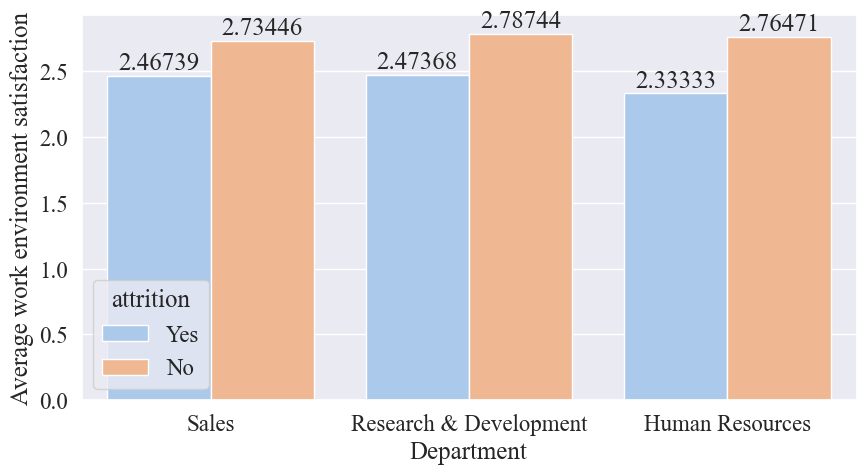

In [34]:
plt.figure(figsize = (10,5))

ax = sns.barplot(x='department', y = 'environment_satisfaction', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Department')
plt.ylabel('Average work environment satisfaction')

Text(0, 0.5, 'Average job satisfaction')

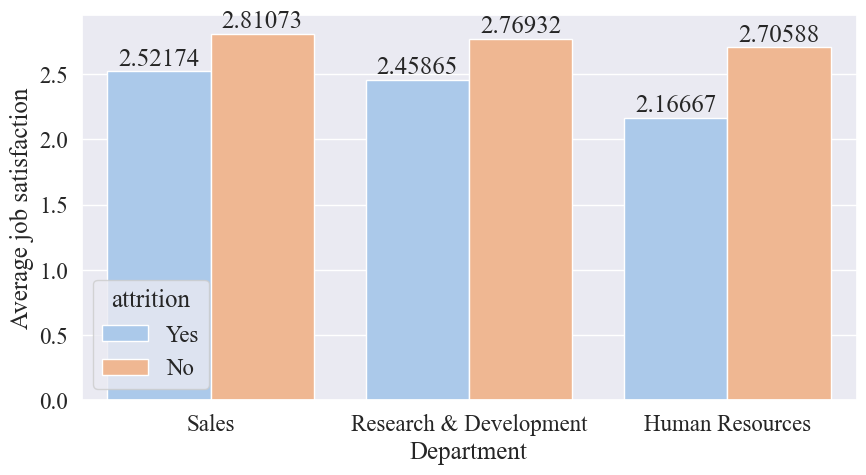

In [35]:
plt.figure(figsize = (10,5))

ax = sns.barplot(x='department', y = 'job_satisfaction', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Department')
plt.ylabel('Average job satisfaction')

Text(0, 0.5, 'Average work/life balance')

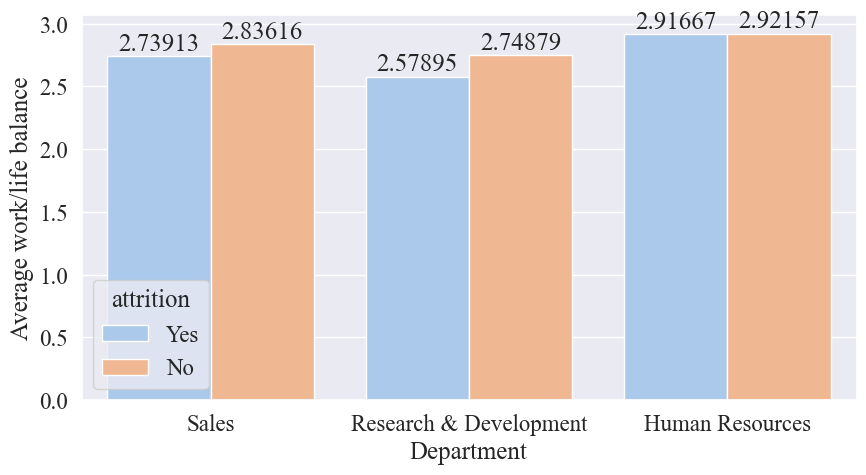

In [36]:
plt.figure(figsize = (10,5))

ax = sns.barplot(x='department', y = 'work_life_balance', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Department')
plt.ylabel('Average work/life balance')

In [37]:
# These factors are all important to keep the employees happy with their jobs and should be considered
# The data shows the people who left the company seemed to have a lower than avarage satisfactory reviews...
# compared to the employees who are still working there.

### 5. Distance based analysis and visualization

In [38]:
# Descriptive statistics of the distance from home variable

data['distance_from_home'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distance_from_home, dtype: float64

Text(0.5, 21.444444444444443, 'Distance from home')

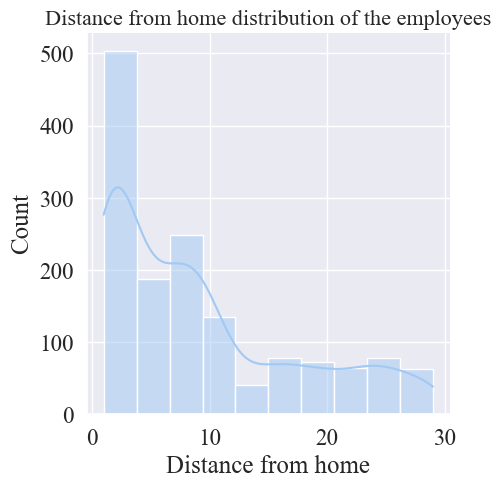

In [39]:
# Showing the distanec from home distribution using a histogram

sns.displot(x = 'distance_from_home', data = data, kde = True, bins = 10)

plt.title('Distance from home distribution of the employees', fontsize = 16)
plt.xlabel('Distance from home')

Text(0, 0.5, 'Average distance from home')

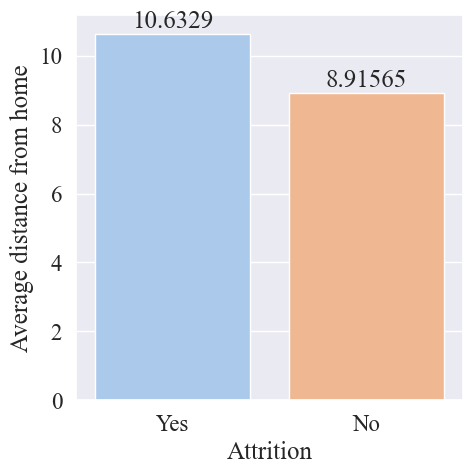

In [40]:
# Average distance from home based on whether the employee is still at the company or not

plt.figure(figsize = (5,5))

ax = sns.barplot(x='attrition', y = 'distance_from_home', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Attrition')
plt.ylabel('Average distance from home')

In [41]:
# The ex employees on average had to travel more than the employees who still work at the comapny

Text(0, 0.5, 'Average job satisfaction')

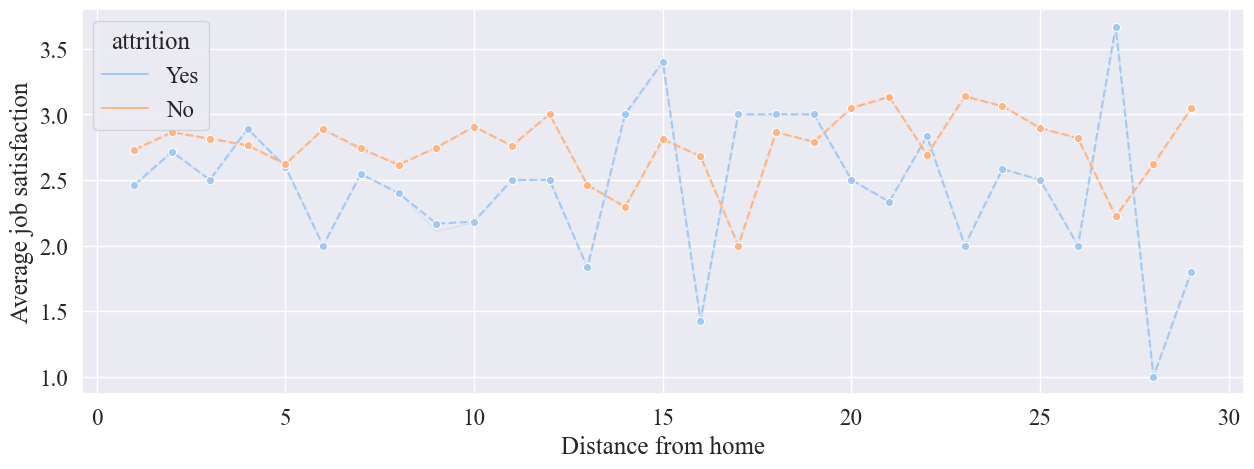

In [42]:
plt.figure(figsize = (15,5))

sns.lineplot(data=data, x='distance_from_home', 
             y='job_satisfaction', hue = 'attrition', marker='o', linestyle='--', ci = False);

plt.xlabel('Distance from home')
plt.ylabel('Average job satisfaction')

In [43]:
# No appartent trend

### 6. Education based analysis and visualization

In [44]:
data['education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: education, dtype: int64

In [45]:
data['education'].value_counts(normalize=True)

3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: education, dtype: float64

Text(0.5, 0, 'Education level')

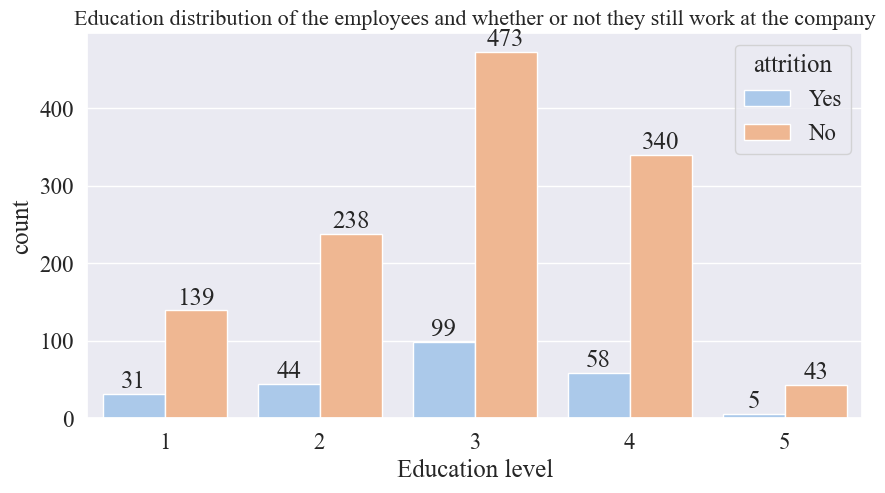

In [46]:
# Visualizing the edcuation based distribution of the employees

plt.figure(figsize=(10,5))

ax = sns.countplot(x='education', hue = 'attrition', data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Education distribution of the employees and whether or not they still work at the company', fontsize = 16)
plt.xlabel('Education level')

In [47]:
# Relative attrition rates:
# Below college = 18.24%
# College = 15.60%
# Bachelor = 17.31%
# Master = 14.57%
# Doctor = 10.42%

In [48]:
data.groupby('education')['monthly_income'].mean()

education
1    5640.570588
2    6226.645390
3    6517.263986
4    6832.402010
5    8277.645833
Name: monthly_income, dtype: float64

Text(0, 0.5, 'Average monthly income')

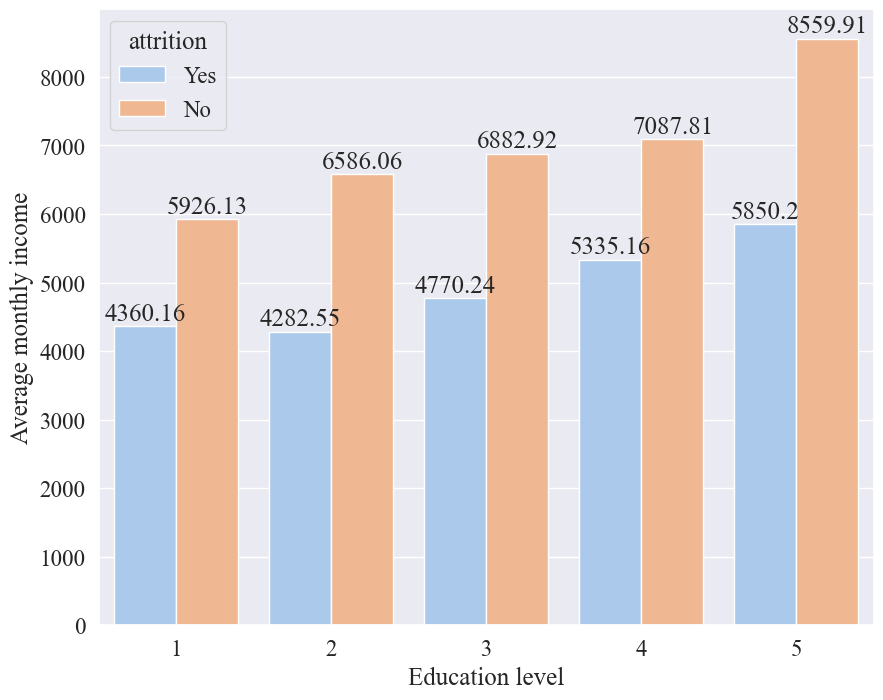

In [49]:
plt.figure(figsize = (10,8))

ax = sns.barplot(x='education', y = 'monthly_income', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Education level')
plt.ylabel('Average monthly income')

In [50]:
# For all education levels, the ex employees earned on average less than the current emplyoees
# In general, there is a positive trend between education level and monthly income

Text(0, 0.5, 'Average education level')

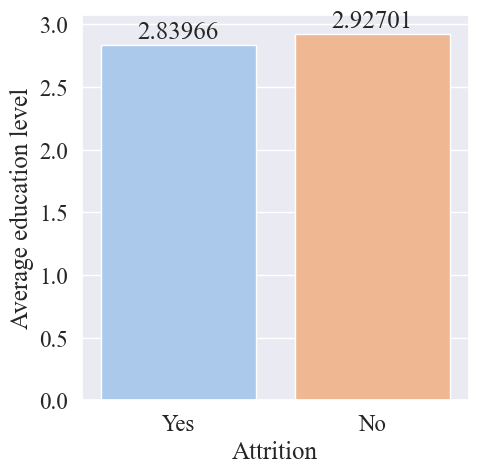

In [51]:
# Average education level based on whether the employee is still at the company or not

plt.figure(figsize = (5,5))

ax = sns.barplot(x='attrition', y = 'education', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Attrition')
plt.ylabel('Average education level')

In [52]:
# The average education level of current employees is slightly higher than that of ex employees

### 7. Income based analysis and visualization

In [53]:
# Descriptive statistics of the monthly income variable

data['monthly_income'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: monthly_income, dtype: float64

Text(0.5, 21.444444444444443, 'Monthly income')

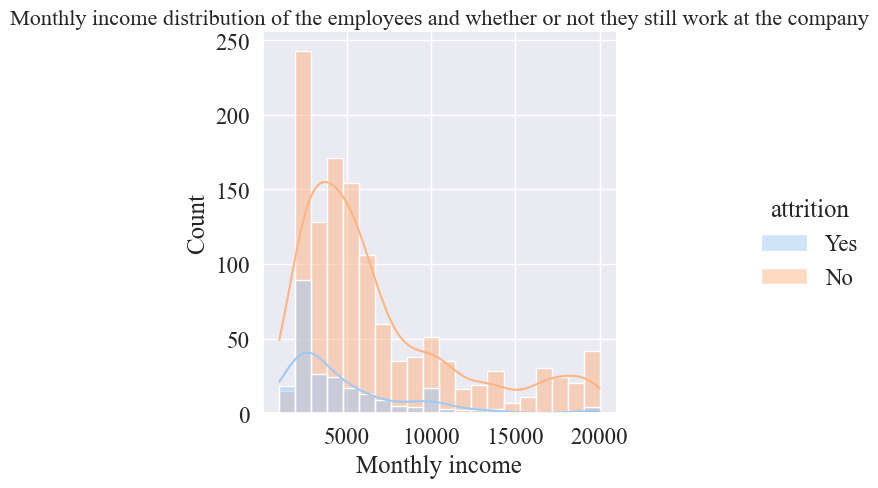

In [54]:
# Showing the monthly income distribution using a histogram

sns.displot(x = 'monthly_income', hue= 'attrition', data = data, kde = True, bins = 20)

plt.title('Monthly income distribution of the employees and whether or not they still work at the company', fontsize = 16)
plt.xlabel('Monthly income')

In [55]:
# In order to make analysis easier, I will divide the monthly income into 4 groups:
# Group 1: 0 - 5000
# Group 2: 5000 - 10000
# Group 3: 10000 - 15000
# Group 4: 15000 - 20000

bins = [0, 5000, 10000, 15000, 20000]
labels = [1, 2, 3, 4]

data['income_group'] = pd.cut(data['monthly_income'], bins = bins, labels = labels)

In [56]:
data.head()

,age,attrition,department,distance_from_home,education,education_field,environment_satisfaction,job_satisfaction,marital_status,monthly_income,num_companies_worked,work_life_balance,years_at_company,age_group,income_group
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,3,2
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,3,2
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,2,1
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,2,1
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,1,1


Text(0.5, 0, 'Income Group')

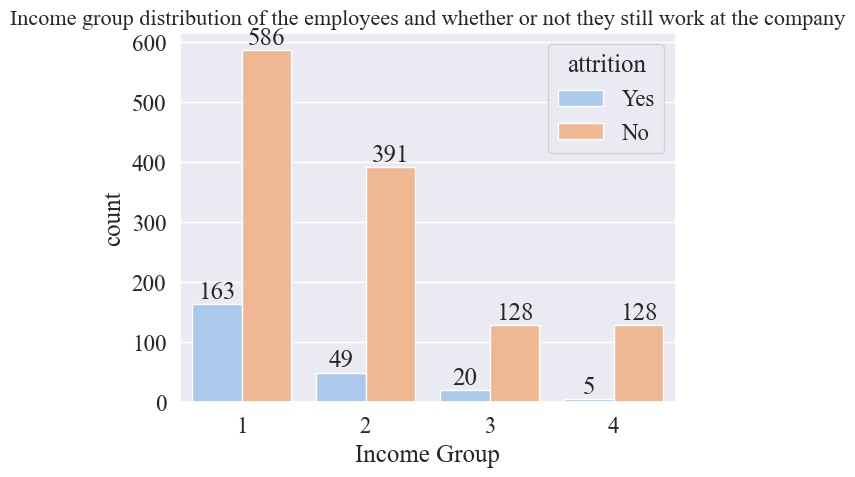

In [57]:
ax = sns.countplot(x='income_group', hue = 'attrition', data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Income group distribution of the employees and whether or not they still work at the company', fontsize = 16)
plt.xlabel('Income Group')

In [58]:
# Using the values shown in the graph we can calculate the relative attrition rate for each age group
# This will help determine which income group has a higher tendency to leave the company

Text(0, 0.5, 'Average job satisfaction')

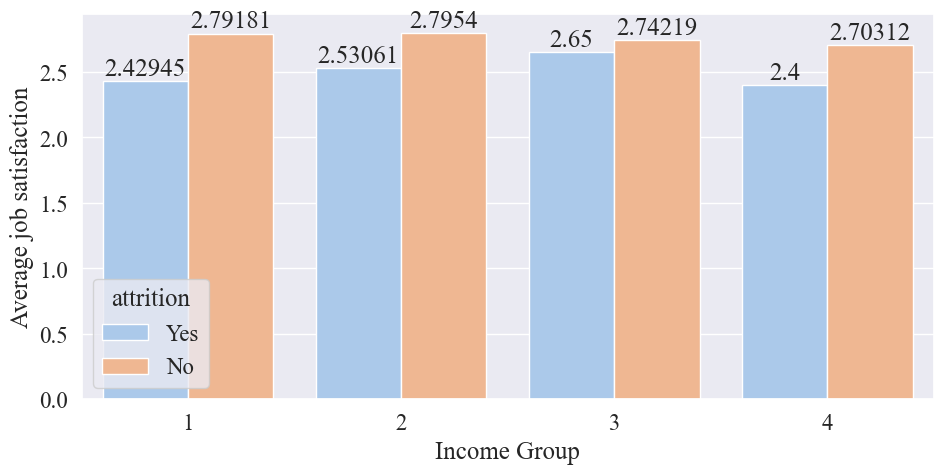

In [59]:
plt.figure(figsize = (11,5))

ax = sns.barplot(x='income_group', y = 'job_satisfaction', hue = 'attrition', ci = False, data = data);
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Income Group')
plt.ylabel('Average job satisfaction')

In [60]:
# Seems to be no apparent trend between income group and job satisfaction
# Ex eomploees earned on average less than current emplyoees in every income group

### 8. Correlation test

In [61]:
corr_data = data.corr()
corr_data

,age,distance_from_home,education,environment_satisfaction,job_satisfaction,monthly_income,num_companies_worked,work_life_balance,years_at_company
age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
distance_from_home,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
environment_satisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
job_satisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
monthly_income,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
num_companies_worked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
work_life_balance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
years_at_company,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


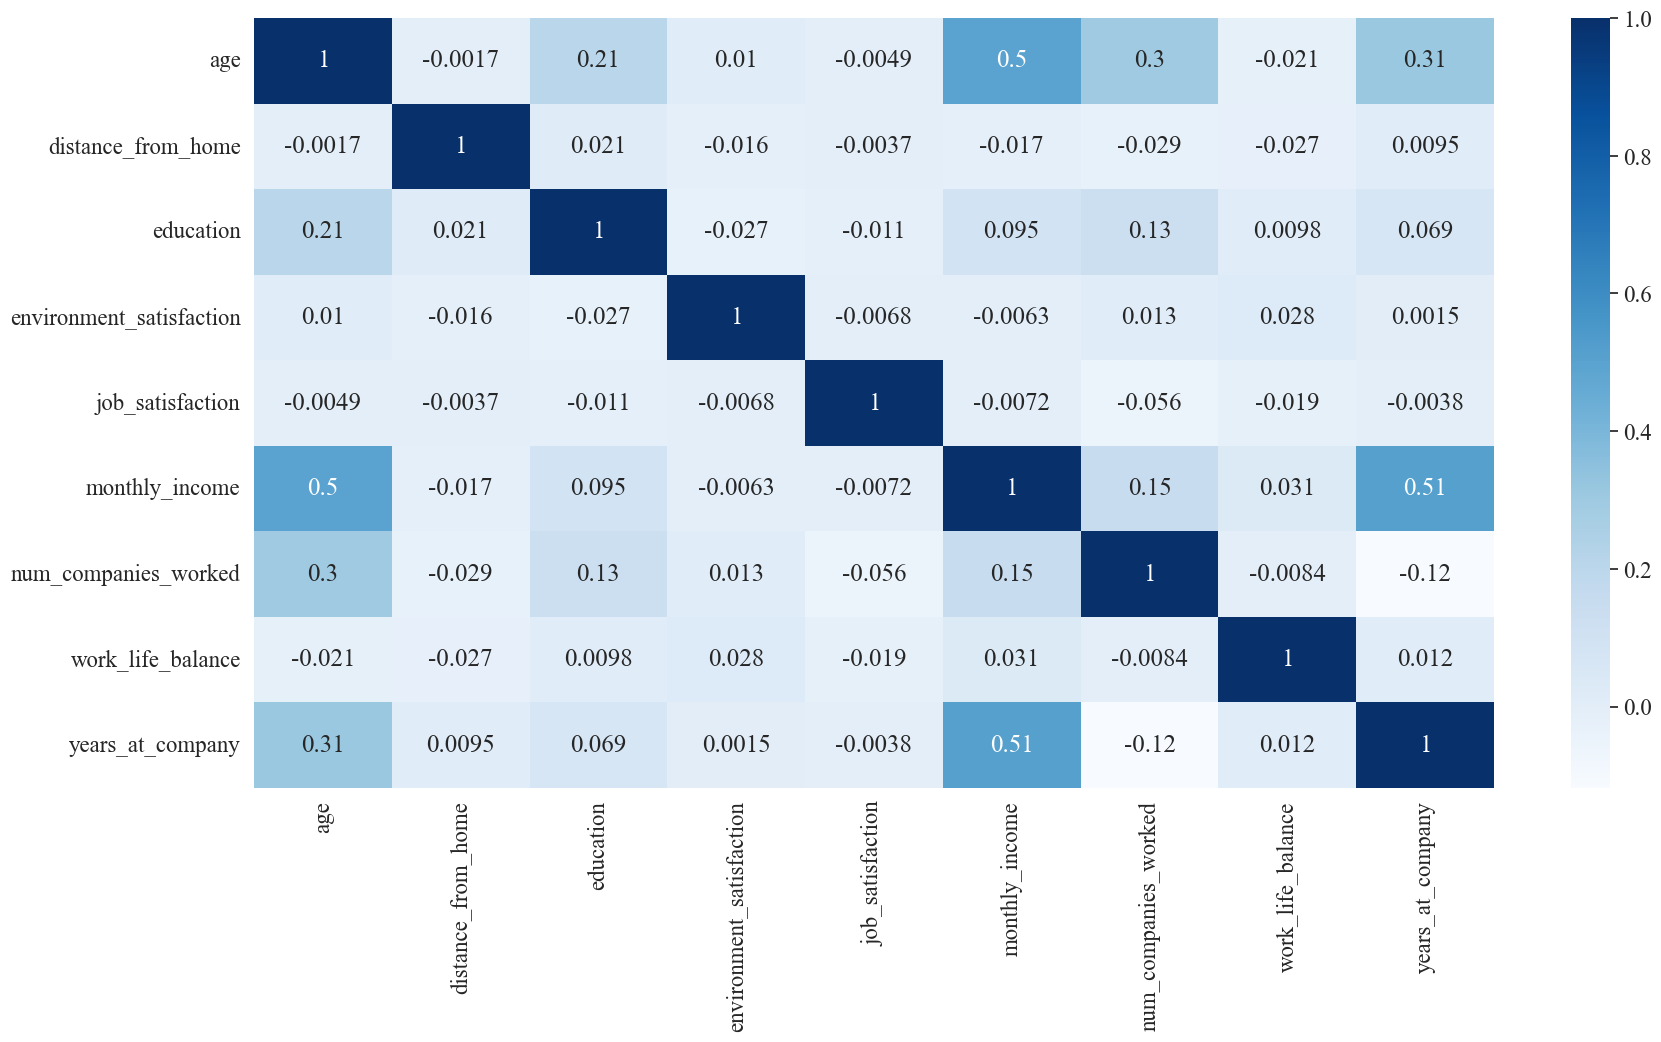

In [62]:
# Visualizing the correlation

plt.figure(figsize=(20,10))

sns.heatmap(corr_data, cmap='Blues', annot=True);